# Universal Healthcare NLP Project

###### This project will explore twitter discussions surrounding the implementation of universal healthcare. The aim will be to create a topic model to display the most common fields of concern for those discussing universal healthcare to better create campaigns and solutions to address any hesitations against it.  

This notebook follows adding sentiment analysis on tweets.

In [ ]:
# Import Libraries
from textblob import TextBlob
import sys
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
import nltk
# nltk.downloader.download('vader_lexicon')

In [ ]:
#pull in data
df = pd.read_csv('/Users/mehikapatel/Universal_Healthcare_NLP/Data/SecondTwitterDF').drop(columns='Unnamed: 0')

In [90]:
df["tweet"].head()

0    lyra importance medicare universal healthcare:...
1    @jordanchariton right. people don’t forced med...
2    @sentedcruz that’s cool stand country universa...
3    @jordanchariton hillary clinton 100% ride medi...
4    thinking guy “if pick one, pick universal heal...
Name: tokens_back_to_text, dtype: object

In [78]:
#Calculating Negative, Positive, Neutral and Compound values
df[["pol","subj"]] = df["tokens_back_to_text"].apply(lambda Text: pd.Series(TextBlob(str(Text)).sentiment))


for index, row in df["tokens_back_to_text"].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(str(row))
    neg = score["neg"]
    neu = score["neu"]
    pos = score["pos"]
    comp = score["compound"]
    
    if neg > pos:
        df.loc[index, "sentiment"] = "negative"
    elif pos > neg:
        df.loc[index, "sentiment"] = "positive"
    else:
        df.loc[index, "sentiment"] = "neutral"
        df.loc[index, "neg"] = neg
        df.loc[index, "neu"] = neu
        df.loc[index, "pos"] = pos
        df.loc[index, "compound"] = comp


In [82]:
#Creating new data frames for all sentiments (positive, negative and neutral)

negative_twts = df[df["sentiment"]=="negative"]
positive_twts = df[df["sentiment"]=="positive"]
neutral_twts = df[df["sentiment"]=="neutral"]

In [87]:
#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

#Count_values for sentiment
pc = count_values_in_column(df,"sentiment")

pc

,Total,Percentage
positive,13913,52.59
negative,7994,30.22
neutral,4550,17.20


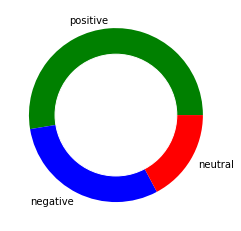

In [88]:
# create data for Pie Chart
pichart = count_values_in_column(df,"sentiment")
names= pc.index
size=pc["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

This is code if I need to save byy sentiment:

In [91]:
# #positive
# positive_twts.to_csv(r'/Users/mehikapatel/Universal_Healthcare_NLP/Data/Positive_TwtsDF')
# #neutr
# neutral_twts.to_csv(r'/Users/mehikapatel/Universal_Healthcare_NLP/Data/Neutral_TwtsDF')
# #negative
# negative_twts.to_csv(r'/Users/mehikapatel/Universal_Healthcare_NLP/Data/Negative_TwtsDF')